# Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# reading the dataset

In [ ]:
df=pd.read_csv("spam.csv",encoding="latin1")

In [ ]:
print(df.head(5))

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


# removing nonsense columns

In [ ]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
print(df.head(5))

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


# Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

# Renaming useful columns

In [ ]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)
print(df.head(5))

  target                                               text
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


# Performing the transformation

In [ ]:
df["target"]=encoder.fit_transform(df["target"])

In [ ]:
print(df.head(5))

   target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...


# finding out the number of columns and rows

In [ ]:
print(df.shape)

(5572, 2)


# Finding out whether there are null values or not

In [ ]:
print(df.isnull().sum())

target    0
text      0
dtype: int64


# Checking for duplicates

In [ ]:
print(df.duplicated().sum())

403


# Dropping duplicate columns

In [ ]:
df.drop_duplicates(keep="first",inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# EDA

In [ ]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
print(df['target'].value_counts())

target
0    4516
1     653
Name: count, dtype: int64


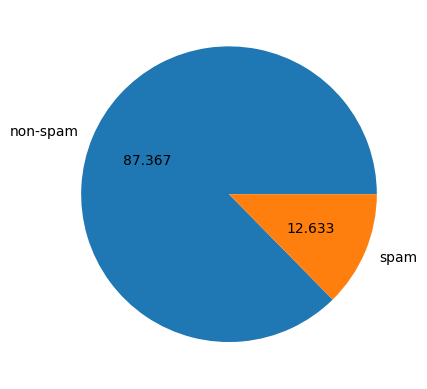

In [ ]:
plt.pie(df["target"].value_counts(),labels=["non-spam","spam"],autopct="%0.3f")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Number of characters added

In [ ]:
df["number_of_characters"]=df["text"].apply(len)

In [ ]:
df.head(5)

,target,text,number_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


# Number of sentences added

In [ ]:
df["number_of_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,number_of_characters,number_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,2
1,0,Ok lar... Joking wif u oni...,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1


In [ ]:
df["number_of_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,number_of_characters,number_of_sentences,number_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,2,24
1,0,Ok lar... Joking wif u oni...,29,2,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2,37
3,0,U dun say so early hor... U c already then say...,49,1,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,1,15


In [ ]:
cols = df.columns.tolist()
print(cols)

['target', 'text', 'number_of_characters', 'number_of_sentences', 'number_of_words']


In [ ]:
cols.append(cols[-1])
cols.append(cols[-3])
cols.pop(3)
cols.pop(3)
print(cols)

['target', 'text', 'number_of_characters', 'number_of_words', 'number_of_sentences']


In [ ]:
df=df[cols]

In [ ]:
df[["number_of_characters","number_of_words","number_of_sentences"]].describe()

,number_of_characters,number_of_words,number_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["target"]==0][["number_of_characters","number_of_words","number_of_sentences"]].describe()

,number_of_characters,number_of_words,number_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["target"]==1][["number_of_characters","number_of_words","number_of_sentences"]].describe()

,number_of_characters,number_of_words,number_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='number_of_characters', ylabel='Count'>

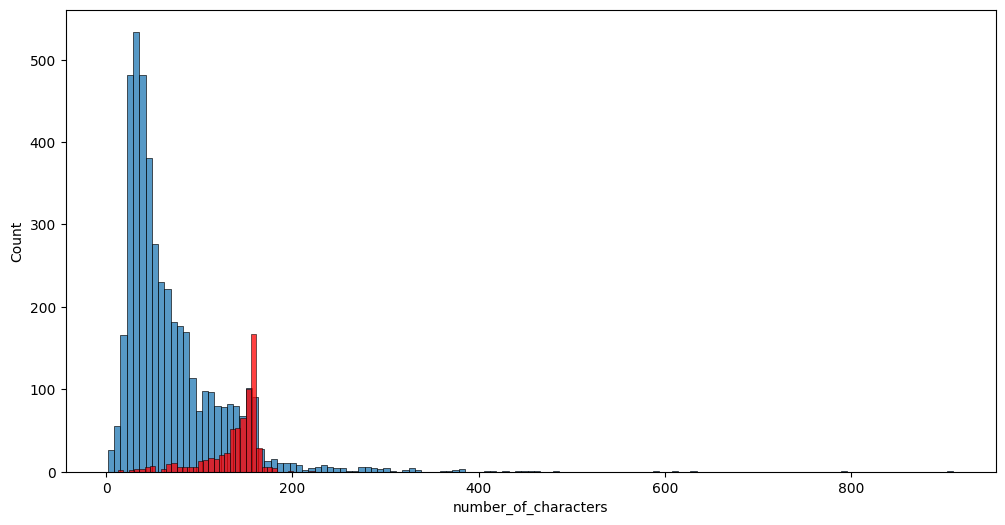

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["number_of_characters"])
sns.histplot(df[df["target"]==1]["number_of_characters"],color="red")

<Axes: xlabel='number_of_words', ylabel='Count'>

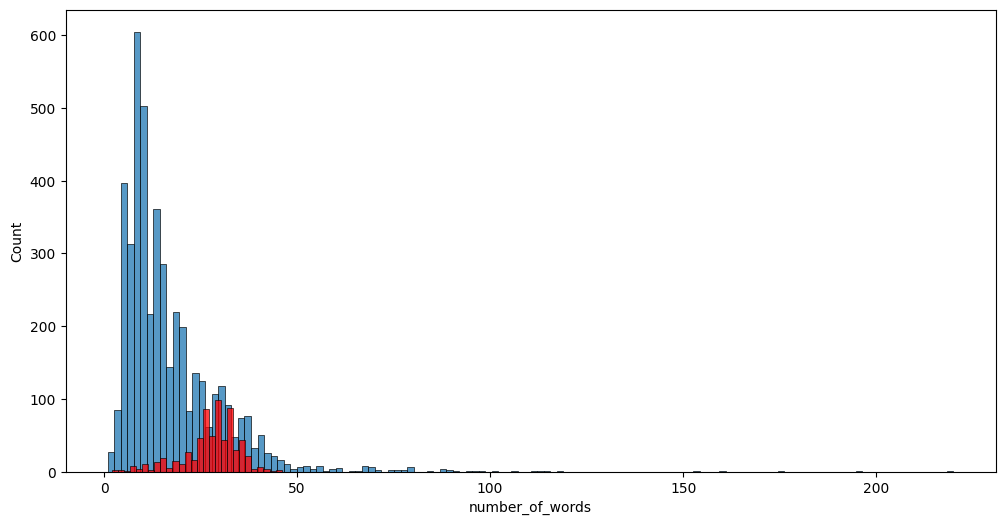

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["number_of_words"])
sns.histplot(df[df["target"]==1]["number_of_words"],color="red")

<Axes: xlabel='number_of_sentences', ylabel='Count'>

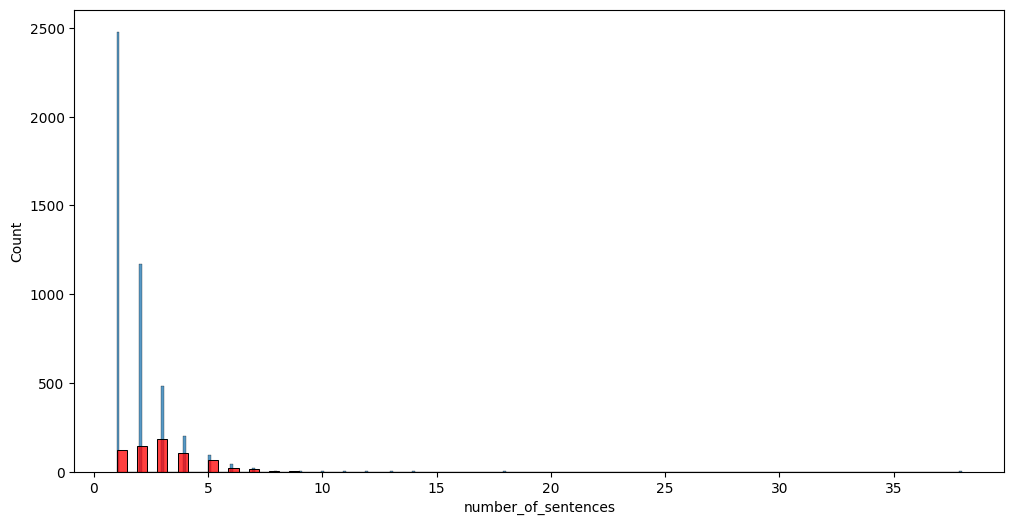

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["number_of_sentences"])
sns.histplot(df[df["target"]==1]["number_of_sentences"],color="red")

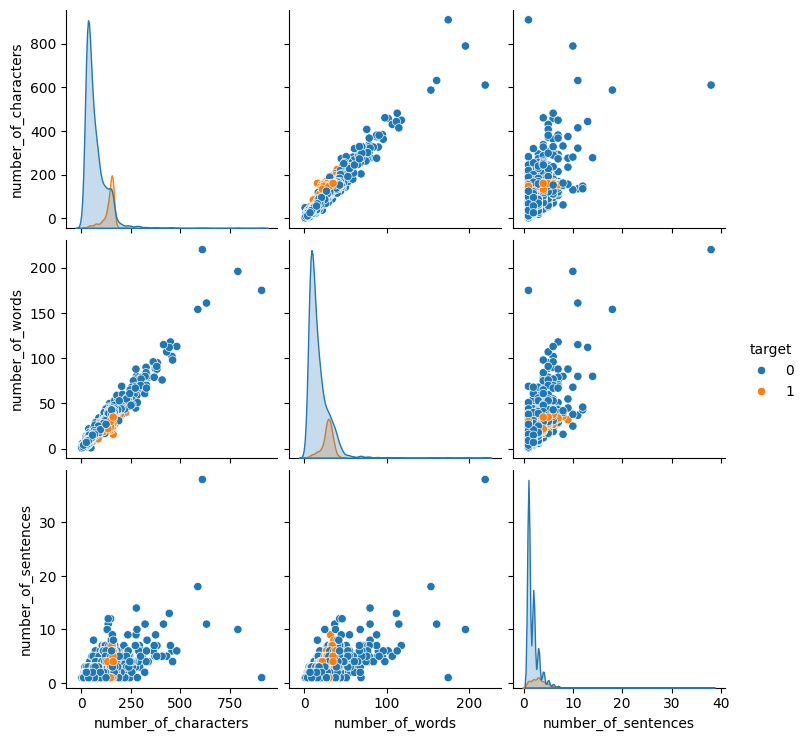

In [ ]:
sns.pairplot(df,hue="target")

# Data Preprocessing

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("laughing")

'laugh'

In [ ]:
import string
from nltk.corpus import stopwords
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
          y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
          y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
print(transform_text("I am laughing"))

laugh


In [ ]:
df["transformed_text"]=df["text"].apply(transform_text)
print(df.head())

   target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

   number_of_characters  number_of_words  number_of_sentences  \
0                   111               24                    2   
1                    29                8                    2   
2                   155               37                    2   
3                    49               13                    1   
4                    61               15                    1   

                                    transformed_text  
0  go jurong point crazi avail bugi n great world...  
1                              ok lar joke wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3   

In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [ ]:
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

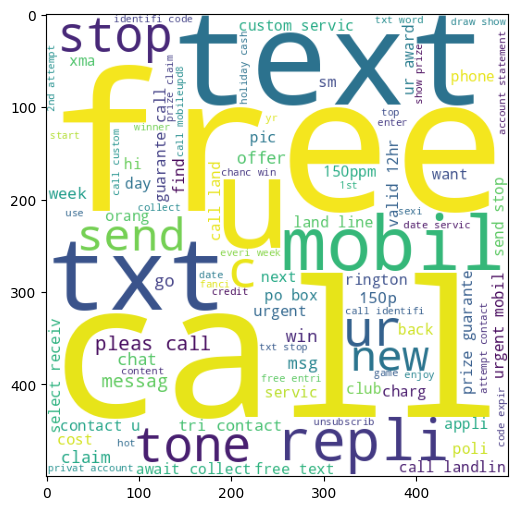

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
non_spam_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

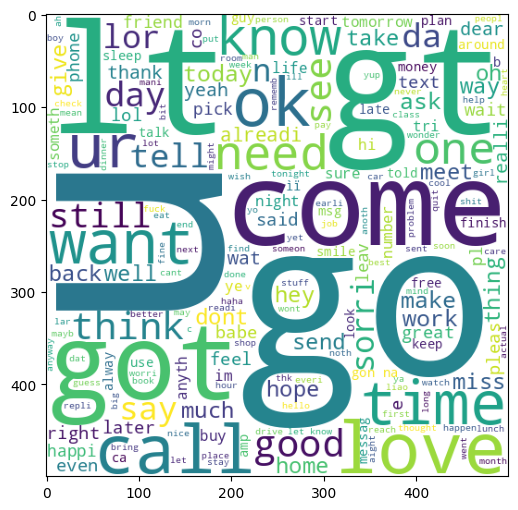

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(non_spam_wc)

In [ ]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)
print(len(spam_corpus))

9939


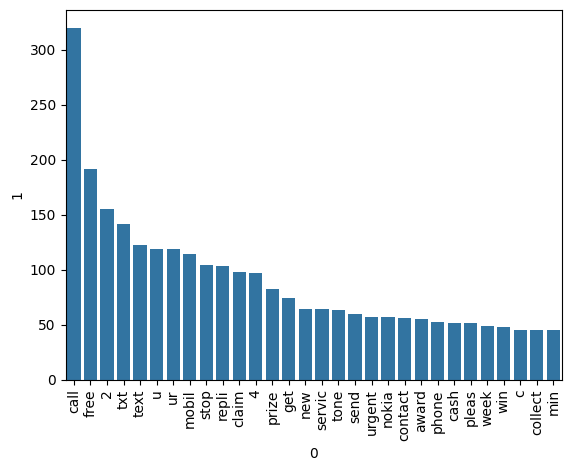

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
non_spam_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
  for word in msg.split():
    non_spam_corpus.append(word)
print(len(non_spam_corpus))

35404


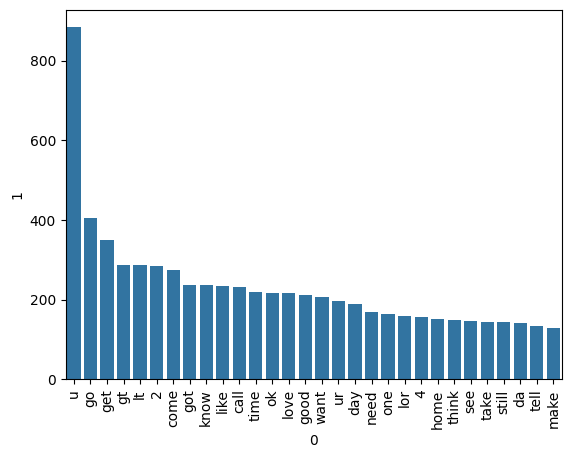

In [ ]:
sns.barplot(x=pd.DataFrame(Counter(non_spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(non_spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# ML Model Training

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [ ]:
X=tfidf.fit_transform(df["transformed_text"]).toarray()
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X.shape

(5169, 3000)

In [ ]:
y=df["target"].values

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [93]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [94]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8607350096711799
[[769 120]
 [ 24 121]]
0.5020746887966805


In [95]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [96]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier


In [98]:
svc=SVC()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
lrc=LogisticRegression()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
etc=ExtraTreesClassifier()
gbdt=GradientBoostingClassifier()
xgb=XGBClassifier()

In [99]:
classifiers={
    "SVC":svc,
    "KNN":knn,
    "NB":mnb,
    "DTC":dtc,
    "LRC":lrc,
    "RFC":rfc,
    "Ada":abc,
    "BC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "XGB":xgb
}

In [100]:
def train_classifier(classifier,X_train,y_train,X_test,y_test):
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [101]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9917355371900827)

In [102]:
accuracy_scores=[]
precision_scores=[]
for name,classifier in classifiers.items():
    accuracy,precision=train_classifier(classifier,X_train,y_train,X_test,y_test)
    print(name)
    print("accuracy:",accuracy)
    print("precision:",precision)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)

SVC
accuracy: 0.9748549323017408
precision: 0.9917355371900827
KNN
accuracy: 0.9061895551257253
precision: 1.0
NB
accuracy: 0.9729206963249516
precision: 0.9915966386554622
DTC
accuracy: 0.9564796905222437
precision: 0.8424657534246576
LRC
accuracy: 0.9584139264990329
precision: 0.9473684210526315
RFC
accuracy: 0.9729206963249516
precision: 0.9915966386554622
Ada
accuracy: 0.9158607350096711
precision: 0.8085106382978723
BC
accuracy: 0.9535783365570599
precision: 0.8540145985401459
ETC
accuracy: 0.9758220502901354
precision: 0.96875
GBDT
accuracy: 0.9593810444874274
precision: 0.963963963963964
XGB
accuracy: 0.9690522243713733
precision: 0.9312977099236641


In [103]:
performance_df=pd.DataFrame({"Algorithm":classifiers.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores})

In [104]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.974855,0.991736
1,KNN,0.906190,1.000000
2,NB,0.972921,0.991597
3,DTC,0.956480,0.842466
4,LRC,0.958414,0.947368
5,RFC,0.972921,0.991597
6,Ada,0.915861,0.808511
7,BC,0.953578,0.854015
8,ETC,0.975822,0.968750
9,GBDT,0.959381,0.963964


In [106]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[("etc",etc),("nb",mnb),("rfc",rfc)],voting="soft")
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 1.0


In [107]:
import pickle
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(voting,open("model.pkl","wb"))